In [1]:
# import package 
import numpy as np
import matplotlib.pyplot as plt
from numpy import log10 as lg
from numpy import pi as pi
from numpy import sin as sin
from numpy import cos as cos
from scipy.interpolate import interp1d as sp_interp1d
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from scipy.integrate import ode
import warnings
import timeit
import scipy.optimize as opt
from matplotlib import cm
from astropy import constants as const
from astropy import units as u
from scipy.special import lqmn as qmn
from __future__ import division
import scipy.special as sc
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                              AutoMinorLocator)
from sympy import var, plot_implicit
import math
from math import radians as radian

# customize the plot 
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['ytick.minor.size'] = 4
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['axes.labelpad'] = 8.0
plt.rcParams['figure.constrained_layout.h_pad'] = 0
plt.rcParams['text.usetex'] = True
plt.rc('text', usetex=True)
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.tick_params(axis='both', which='minor', labelsize=18)
import matplotlib.ticker
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)


# introduce constants that I use
G=const.G.cgs.value
c=const.c.cgs.value
Ms=const.M_sun.cgs.value
hbar=const.hbar.cgs.value
m_n=const.m_n.cgs.value
km=10**5
yr=(1.0*u.yr).cgs.value
plt.close()

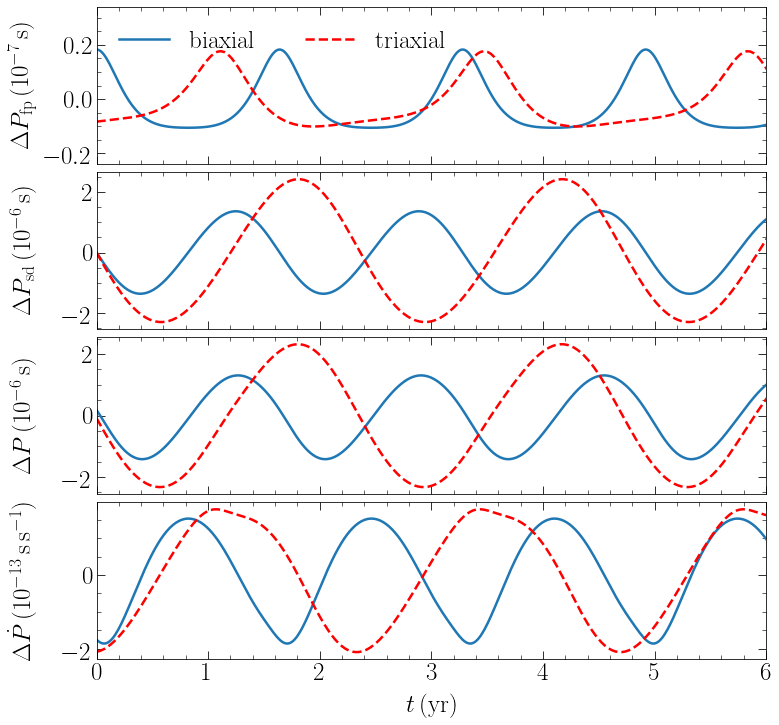

In [7]:
fig, (ax1,ax2,ax3,ax4)=plt.subplots(4,1, figsize=(12,12),sharex=True)
plt.subplots_adjust(hspace=0.05)
color=['tab:blue','red']
lines=['solid','dashed']
label=[r'$\rm biaxial$',r'$\rm triaxial$']

names=['timing1','triaxial_timing1']

for i in range(len(names)):
    data1=np.genfromtxt('./data/'+names[i]+'.dat')
    if i==0:
        t=data1[:,0]/yr
    if i==1:
        t=(data1[:,0]-1.0945362550047135*10**7)/yr
    dp1=data1[:,1]
    dp2=data1[:,2]
    dpdot=data1[:,3]+data1[:,4]
#     dpdot=data1[:,2]/1e-12
    ax1.plot(t,dp1/1e-6,color=color[i],linestyle=lines[i],linewidth=2.5,label=label[i])
    ax2.plot(t,dp2/1e-6,color=color[i],linestyle=lines[i],linewidth=2.5)
    ax3.plot(t,(dp2+dp1)/1e-6,color=color[i],linestyle=lines[i],linewidth=2.5)
    ax4.plot(t,dpdot/1e-13,color=color[i],linestyle=lines[i],linewidth=2.5)
#     ax2.plot(t,dpdot,color=color[i],linestyle=lines[i],linewidth=2.5)
    
ax1.minorticks_on()
ax2.minorticks_on()
ax3.minorticks_on()
ax4.minorticks_on()
ax1.set_ylim(-0.24,0.34)  
ax1.legend(fontsize=25,frameon=False,ncol=2)
ax2.minorticks_on()
plt.xlim(0,6)
# plt.xticks([0,0.1,0.2,0.3,0.4])
# ax2.set_ylim(-2.6,2.1)
ax1.set_ylabel(r'$\Delta P_{\rm fp}\,(10^{-7}\,\rm s)$',fontsize=25)
ax2.set_ylabel(r'$\Delta P_{\rm sd}\,(10^{-6}\,\rm s)$',fontsize=25)
ax3.set_ylabel(r'$\Delta P\,(10^{-6}\,\rm s)$',fontsize=25)
ax4.set_ylabel(r'$\Delta \dot{P}\,(10^{-13}\,\rm s\,s^{-1})$',fontsize=25)
fig.align_labels()
plt.xlabel(r'$t\,(\rm yr)$',fontsize=25)
plt.savefig("./fig/fig_timing1.pdf", format='pdf', bbox_inches="tight")

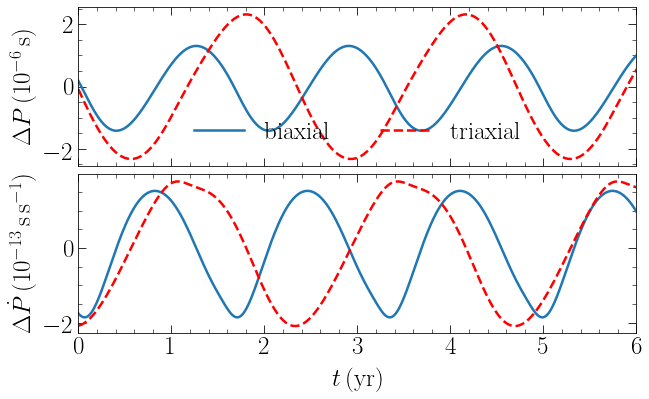

In [11]:
fig, (ax3,ax4)=plt.subplots(2,1, figsize=(10,6),sharex=True)
plt.subplots_adjust(hspace=0.05)
color=['tab:blue','red']
lines=['solid','dashed']
label=[r'$\rm biaxial$',r'$\rm triaxial$']

names=['timing1','triaxial_timing1']

for i in range(len(names)):
    data1=np.genfromtxt('./data/'+names[i]+'.dat')
    if i==0:
        t=data1[:,0]/yr
    if i==1:
        t=(data1[:,0]-1.0945362550047135*10**7)/yr
    dp1=data1[:,1]
    dp2=data1[:,2]
    dpdot=data1[:,3]+data1[:,4]
#     dpdot=data1[:,2]/1e-12
    ax3.plot(t,(dp2+dp1)/1e-6,color=color[i],linestyle=lines[i],linewidth=2.5,label=label[i])
    ax4.plot(t,dpdot/1e-13,color=color[i],linestyle=lines[i],linewidth=2.5)
#     ax2.plot(t,dpdot,color=color[i],linestyle=lines[i],linewidth=2.5)
    

ax3.minorticks_on()
ax4.minorticks_on() 
ax3.legend(fontsize=25,frameon=False,ncol=2)
plt.xlim(0,6)
# plt.xticks([0,0.1,0.2,0.3,0.4])
# ax2.set_ylim(-2.6,2.1)

ax3.set_ylabel(r'$\Delta P\,(10^{-6}\,\rm s)$',fontsize=25)
ax4.set_ylabel(r'$\Delta \dot{P}\,(10^{-13}\,\rm s\,s^{-1})$',fontsize=25)
fig.align_labels()
plt.xlabel(r'$t\,(\rm yr)$',fontsize=25)
plt.savefig("../fig_timing1.pdf", format='pdf', bbox_inches="tight")

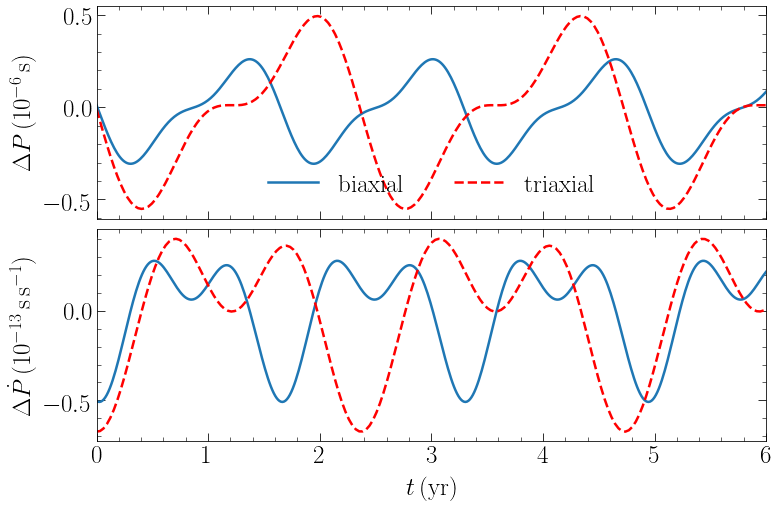

In [7]:

fig, (ax3,ax4)=plt.subplots(2,1, figsize=(12,8),sharex=True)
plt.subplots_adjust(hspace=0.05)
color=['tab:blue','red']
lines=['solid','dashed']
label=[r'$\rm biaxial$',r'$\rm triaxial$']

names=['timing2','triaxial_timing2']

for i in range(len(names)):
    data1=np.genfromtxt('./data/'+names[i]+'.dat')
    if i==0:
        t=data1[:,0]/yr
    if i==1:
        t=(data1[:,0]-1.1258411622761961*10**7)/yr
    dp1=data1[:,1]
    dp2=data1[:,2]
    dpdot=data1[:,3]+data1[:,4]
#     dpdot=data1[:,2]/1e-12
    ax3.plot(t,(dp2+dp1)/1e-6,color=color[i],linestyle=lines[i],linewidth=2.5,label=label[i])
    ax4.plot(t,dpdot/1e-13,color=color[i],linestyle=lines[i],linewidth=2.5)
#     ax2.plot(t,dpdot,color=color[i],linestyle=lines[i],linewidth=2.5)

ax3.minorticks_on()
ax4.minorticks_on()

ax3.legend(fontsize=25,frameon=False,ncol=2)

plt.xlim(0,6)
# plt.xticks([0,0.1,0.2,0.3,0.4])
# ax2.set_ylim(-2.6,2.1)

ax3.set_ylabel(r'$\Delta P\,(10^{-6}\,\rm s)$',fontsize=25)
ax4.set_ylabel(r'$\Delta \dot{P}\,(10^{-13}\,\rm s\,s^{-1})$',fontsize=25)
fig.align_labels()
plt.xlabel(r'$t\,(\rm yr)$',fontsize=25)
plt.savefig("./fig/fig_timing2.pdf", format='pdf', bbox_inches="tight")

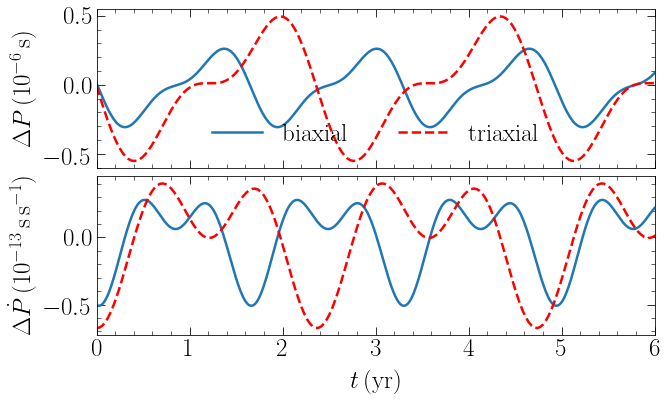

In [12]:

fig, (ax3,ax4)=plt.subplots(2,1, figsize=(10,6),sharex=True)
plt.subplots_adjust(hspace=0.05)
color=['tab:blue','red']
lines=['solid','dashed']
label=[r'$\rm biaxial$',r'$\rm triaxial$']

names=['timing2','triaxial_timing2']

for i in range(len(names)):
    data1=np.genfromtxt('./data/'+names[i]+'.dat')
    if i==0:
        t=data1[:,0]/yr
    if i==1:
        t=(data1[:,0]-1.1258411622761961*10**7)/yr
    dp1=data1[:,1]
    dp2=data1[:,2]
    dpdot=data1[:,3]+data1[:,4]
#     dpdot=data1[:,2]/1e-12
    ax3.plot(t,(dp2+dp1)/1e-6,color=color[i],linestyle=lines[i],linewidth=2.5,label=label[i])
    ax4.plot(t,dpdot/1e-13,color=color[i],linestyle=lines[i],linewidth=2.5)
#     ax2.plot(t,dpdot,color=color[i],linestyle=lines[i],linewidth=2.5)

ax3.minorticks_on()
ax4.minorticks_on()

ax3.legend(fontsize=25,frameon=False,ncol=2)

plt.xlim(0,6)
# plt.xticks([0,0.1,0.2,0.3,0.4])
# ax2.set_ylim(-2.6,2.1)

ax3.set_ylabel(r'$\Delta P\,(10^{-6}\,\rm s)$',fontsize=25)
ax4.set_ylabel(r'$\Delta \dot{P}\,(10^{-13}\,\rm s\,s^{-1})$',fontsize=25)
fig.align_labels()
plt.xlabel(r'$t\,(\rm yr)$',fontsize=25)
plt.savefig("../fig_timing2.pdf", format='pdf', bbox_inches="tight")

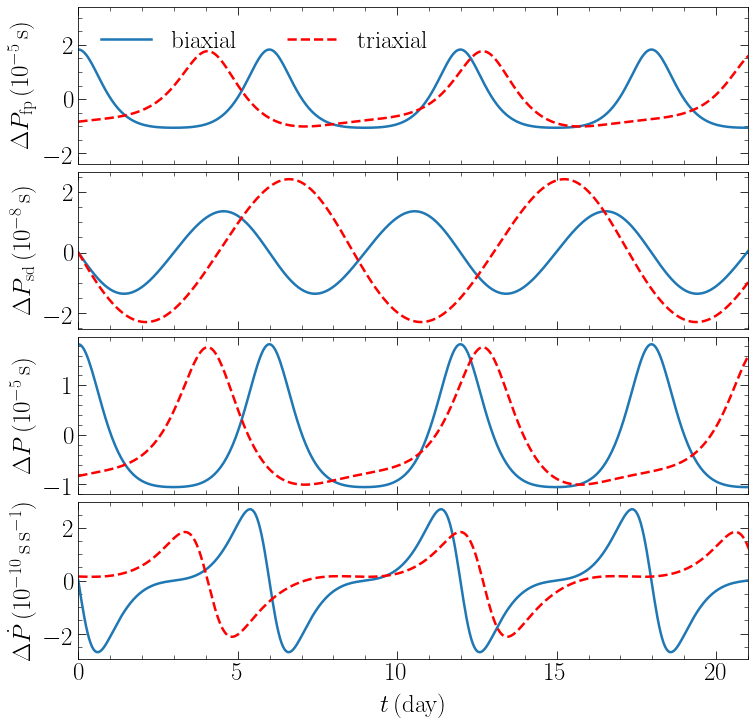

In [11]:
fig, (ax1,ax2,ax3,ax4)=plt.subplots(4,1, figsize=(12,12),sharex=True)
plt.subplots_adjust(hspace=0.05)
color=['tab:blue','red']
lines=['solid','dashed']
label=[r'$\rm biaxial$',r'$\rm triaxial$']

names=['timing3','triaxial_timing3']

for i in range(len(names)):
    data1=np.genfromtxt('./data/'+names[i]+'.dat')
    if i==0:
        t=data1[:,0]/86400
    if i==1:
        t=(data1[:,0]-109454.0)/86400
    dp1=data1[:,1]
    dp2=data1[:,2]
    dpdot=data1[:,3]+data1[:,4]
#     dpdot=data1[:,2]/1e-12
    ax1.plot(t,dp1/1e-5,color=color[i],linestyle=lines[i],linewidth=2.5,label=label[i])
    ax2.plot(t,dp2/1e-8,color=color[i],linestyle=lines[i],linewidth=2.5)
    ax3.plot(t,(dp2+dp1)/1e-5,color=color[i],linestyle=lines[i],linewidth=2.5)
    ax4.plot(t,dpdot/1e-10,color=color[i],linestyle=lines[i],linewidth=2.5)
#     ax2.plot(t,dpdot,color=color[i],linestyle=lines[i],linewidth=2.5)
    
ax1.minorticks_on()
ax2.minorticks_on()
ax3.minorticks_on()
ax4.minorticks_on()
ax1.set_ylim(-2.4,3.4)  
ax1.legend(fontsize=25,frameon=False,ncol=2)
ax2.minorticks_on()
plt.xlim(0,21)
# plt.xticks([0,0.1,0.2,0.3,0.4])
# ax2.set_ylim(-2.6,2.1)
ax1.set_ylabel(r'$\Delta P_{\rm fp}\,(10^{-5}\,\rm s)$',fontsize=25)
ax2.set_ylabel(r'$\Delta P_{\rm sd}\,(10^{-8}\,\rm s)$',fontsize=25)
ax3.set_ylabel(r'$\Delta P\,(10^{-5}\,\rm s)$',fontsize=25)
ax4.set_ylabel(r'$\Delta \dot{P}\,(10^{-10}\,\rm s\,s^{-1})$',fontsize=25)
fig.align_labels()
plt.xlabel(r'$t\,(\rm day)$',fontsize=25)
plt.savefig("./fig/fig_timing3.pdf", format='pdf', bbox_inches="tight")

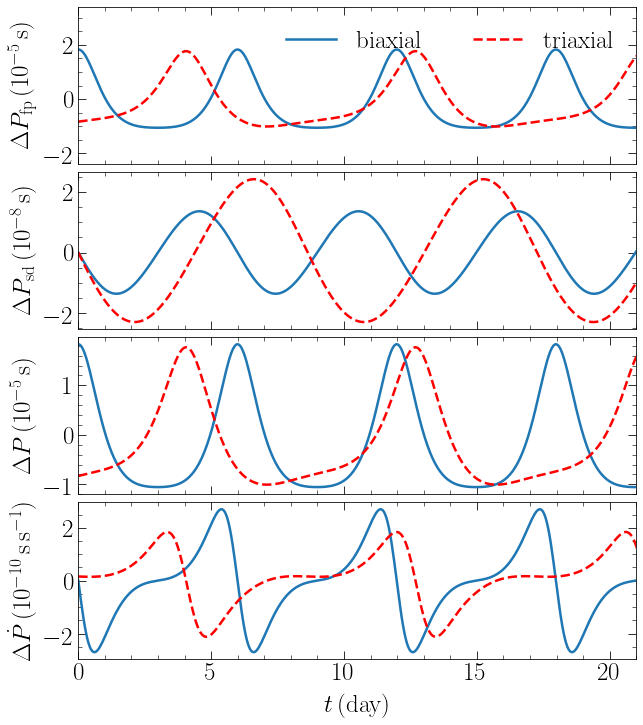

In [14]:
fig, (ax1,ax2,ax3,ax4)=plt.subplots(4,1, figsize=(10,12),sharex=True)
plt.subplots_adjust(hspace=0.05)
color=['tab:blue','red']
lines=['solid','dashed']
label=[r'$\rm biaxial$',r'$\rm triaxial$']

names=['timing3','triaxial_timing3']

for i in range(len(names)):
    data1=np.genfromtxt('./data/'+names[i]+'.dat')
    if i==0:
        t=data1[:,0]/86400
    if i==1:
        t=(data1[:,0]-109454.0)/86400
    dp1=data1[:,1]
    dp2=data1[:,2]
    dpdot=data1[:,3]+data1[:,4]
#     dpdot=data1[:,2]/1e-12
    ax1.plot(t,dp1/1e-5,color=color[i],linestyle=lines[i],linewidth=2.5,label=label[i])
    ax2.plot(t,dp2/1e-8,color=color[i],linestyle=lines[i],linewidth=2.5)
    ax3.plot(t,(dp2+dp1)/1e-5,color=color[i],linestyle=lines[i],linewidth=2.5)
    ax4.plot(t,dpdot/1e-10,color=color[i],linestyle=lines[i],linewidth=2.5)
#     ax2.plot(t,dpdot,color=color[i],linestyle=lines[i],linewidth=2.5)
    
ax1.minorticks_on()
ax2.minorticks_on()
ax3.minorticks_on()
ax4.minorticks_on()
ax1.set_ylim(-2.4,3.4)  
ax1.legend(fontsize=25,frameon=False,ncol=2)
ax2.minorticks_on()
plt.xlim(0,21)
# plt.xticks([0,0.1,0.2,0.3,0.4])
# ax2.set_ylim(-2.6,2.1)
ax1.set_ylabel(r'$\Delta P_{\rm fp}\,(10^{-5}\,\rm s)$',fontsize=25)
ax2.set_ylabel(r'$\Delta P_{\rm sd}\,(10^{-8}\,\rm s)$',fontsize=25)
ax3.set_ylabel(r'$\Delta P\,(10^{-5}\,\rm s)$',fontsize=25)
ax4.set_ylabel(r'$\Delta \dot{P}\,(10^{-10}\,\rm s\,s^{-1})$',fontsize=25)
fig.align_labels()
plt.xlabel(r'$t\,(\rm day)$',fontsize=25)
plt.savefig("../fig_timing3.pdf", format='pdf', bbox_inches="tight")

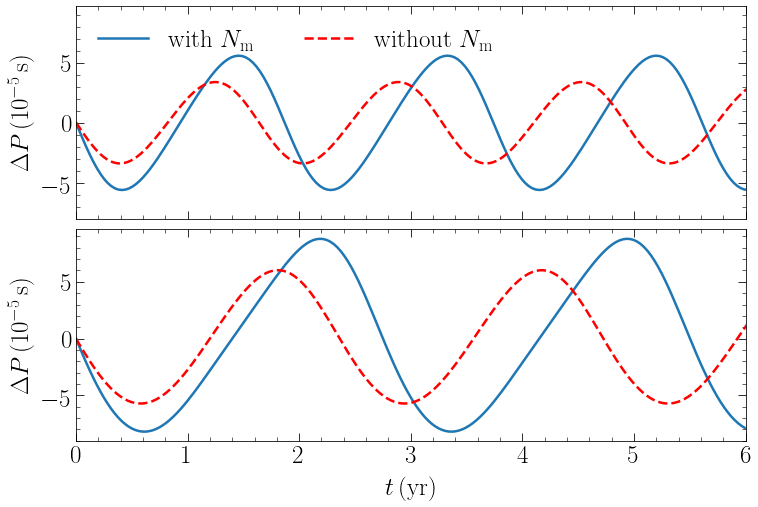

In [43]:
fig, (ax3,ax4)=plt.subplots(2,1, figsize=(12,8),sharex=True)
plt.subplots_adjust(hspace=0.05)
color=['tab:blue','red']
lines=['solid','dashed']
label=[r'${\rm with}\ N_{\rm m}$',r'${\rm without}\ N_{\rm m}$']

names=['biaxial_near_timing1','biaxial_without_timing']

for i in range(len(names)):
    data1=np.genfromtxt('./data/'+names[i]+'.dat')
    if i==0:
        t=data1[:,0]/yr
    if i==1:
        t=(data1[:,0])/yr
    dp1=data1[:,1]
    dp2=data1[:,2]
    ax3.plot(t,(dp2+dp1)/1e-5,color=color[i],linestyle=lines[i],linewidth=2.5,label=label[i])

names=['triaxial_near_timing','triaxial_without_timing']

for i in range(len(names)):
    data1=np.genfromtxt('./data/'+names[i]+'.dat')
    if i==0:
        t=(data1[:,0]-7.23325*10**6)/yr
    if i==1:
        t=(data1[:,0]-1.09454*10**7)/yr
    dp1=data1[:,1]
    dp2=data1[:,2]
    ax4.plot(t,(dp2+dp1)/1e-5,color=color[i],linestyle=lines[i],linewidth=2.5,label=label[i])

ax3.minorticks_on()
ax4.minorticks_on()

ax3.legend(fontsize=25,frameon=False,ncol=2,loc='upper left')

plt.xlim(0,6)
# plt.xticks([0,0.1,0.2,0.3,0.4])
ax3.set_ylim(-8,9.7)

ax3.set_ylabel(r'$\Delta P\,(10^{-5}\,\rm s)$',fontsize=25)
ax4.set_ylabel(r'$\Delta P\,(10^{-5}\,\rm s)$',fontsize=25)
fig.align_labels()
plt.xlabel(r'$t\,(\rm yr)$',fontsize=25)
plt.savefig("./fig/fig_timing4.pdf", format='pdf', bbox_inches="tight")

In [44]:
yr

31557600.0